# Lab Task on Fourier Series

1. Generate C<sub>k</sub>.
2. Plot Them.
3. Show power density spectrum.
4. Try to generate the rectangular pulse train using synthesis-equation

### Warm Up Task:
Generate a sinusoidal task

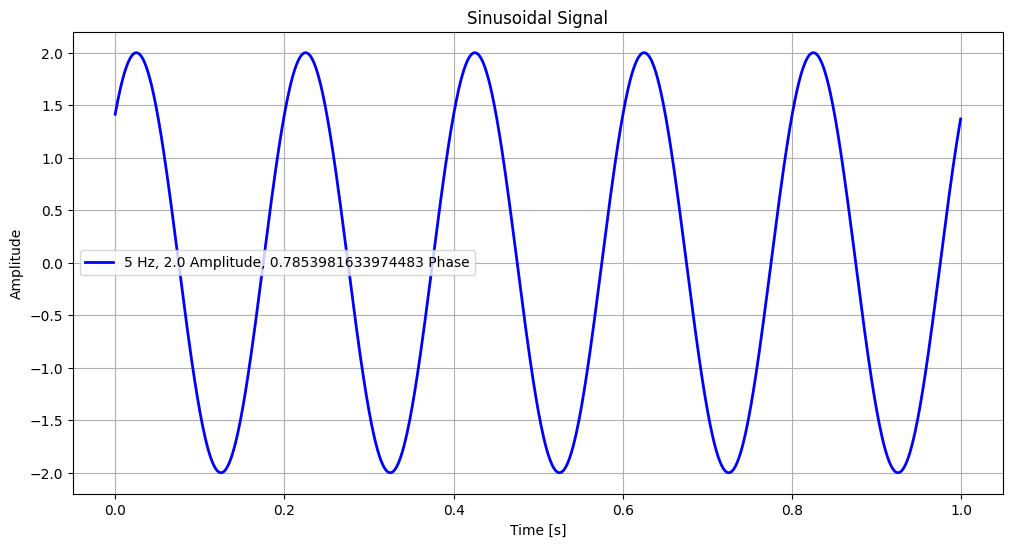

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sinusoidal_signal(frequency=5, sampling_rate=1000, duration=1.0, amplitude=1.0, phase=0):
    num_samples = int(sampling_rate * duration)
    time = np.linspace(0, duration, num_samples, endpoint=False)
    signal = amplitude * np.sin(2 * np.pi * frequency * time + phase)
    return time, signal

def plot_signal(time, signal, frequency, amplitude, phase, title='Sinusoidal Signal', xlabel='Time [s]', ylabel='Amplitude', color='b', linewidth=2):
    plt.figure(figsize=(12, 6))
    plt.plot(time, signal, color=color, linewidth=linewidth, label=f'{frequency} Hz, {amplitude} Amplitude, {phase} Phase')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.show()

# User-defined parameters
frequency = 5
sampling_rate = 1000   
duration = 1.0
amplitude = 2.0
phase = np.pi / 4      

# Generate and plot the sinusoidal signal
time, signal = generate_sinusoidal_signal(frequency, sampling_rate, duration, amplitude, phase)
plot_signal(time, signal, frequency, amplitude, phase)


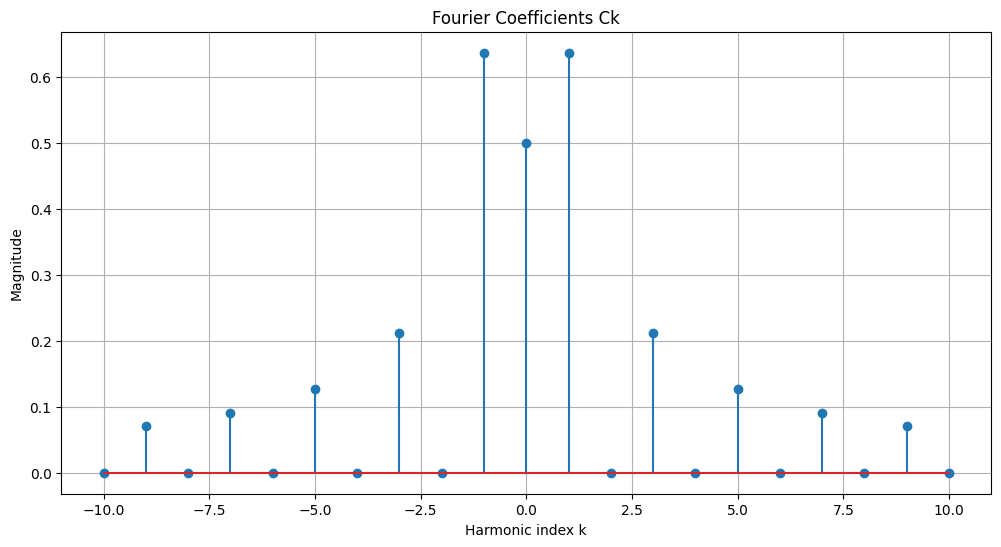

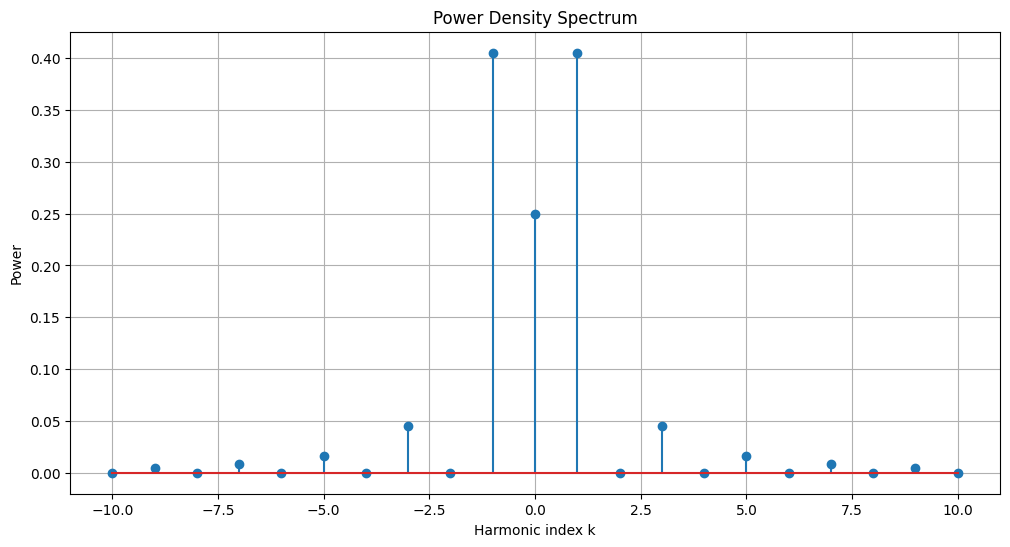

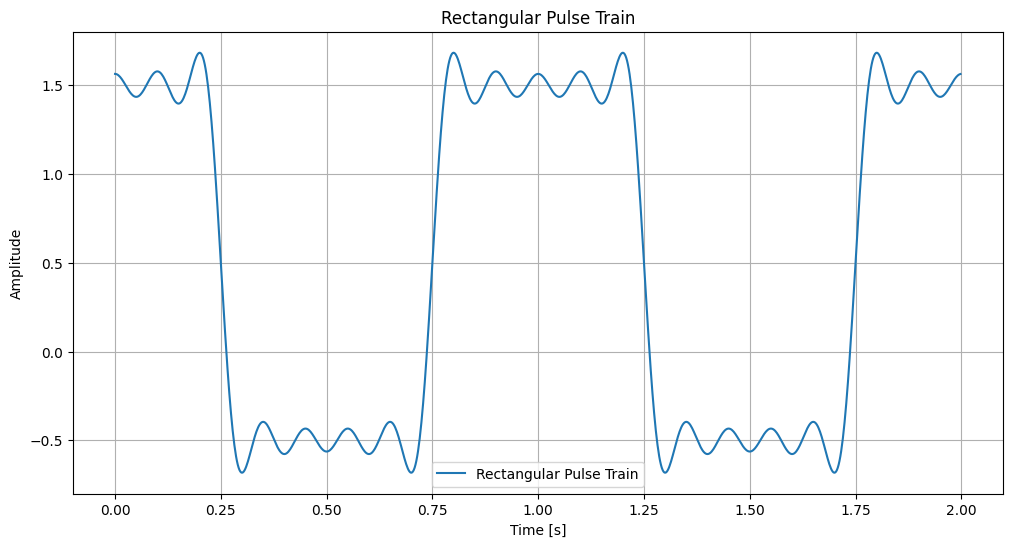

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A_a = 1            # Amplitude of the rectangular pulse train
T = 1              # Period of the rectangular pulse train
a = 0.5            # Pulse width as a fraction of the period (e.g., 0.5 means pulse width = T/2)
fundamental_freq = 1 / T
num_harmonics = 10 # Number of harmonics to consider

# Generate Fourier coefficients Ck
def fourier_coefficients(num_harmonics, T, A_a, a):
    k = np.arange(-num_harmonics, num_harmonics + 1)
    Ck = np.zeros_like(k, dtype=complex)
    for idx, ki in enumerate(k):
        if ki == 0:
            Ck[idx] = A_a * a / T  # DC component
        else:
            # Compute the Fourier coefficient
            Ck[idx] = (A_a / T) * (np.sin(np.pi * ki * a)) / (np.pi * ki * a)
    return k, Ck

# Calculate Fourier coefficients
k, Ck = fourier_coefficients(num_harmonics, T, A_a, a)

# Plot Fourier coefficients
plt.figure(figsize=(12, 6))
plt.stem(k, np.abs(Ck))  # Removed use_line_collection=True
plt.title('Fourier Coefficients Ck')
plt.xlabel('Harmonic index k')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# Plot Power Density Spectrum
power_density = np.abs(Ck) ** 2
plt.figure(figsize=(12, 6))
plt.stem(k, power_density)  # Removed use_line_collection=True
plt.title('Power Density Spectrum')
plt.xlabel('Harmonic index k')
plt.ylabel('Power')
plt.grid(True)
plt.show()

# Generate Rectangular Pulse Train
def rectangular_pulse_train(t, k, Ck):
    # Initialize signal as a complex array
    signal = np.zeros_like(t, dtype=complex)
    for ki, Cki in zip(k, Ck):
        signal += Cki * np.exp(1j * 2 * np.pi * ki * fundamental_freq * t)
    return np.real(signal)  # Return the real part for plotting

# Time axis for signal reconstruction
t = np.linspace(0, 2 * T, 1000, endpoint=False)

# Generate rectangular pulse train using synthesis equation
pulse_train = rectangular_pulse_train(t, k, Ck)

# Plot Rectangular Pulse Train
plt.figure(figsize=(12, 6))
plt.plot(t, pulse_train, label='Rectangular Pulse Train')
plt.title('Rectangular Pulse Train')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()
